Code for PID Controller. This covers both the graph of the results and provides a short video using Gymnasium to show examples. This was written with the help of GPT

In [ ]:
# Install gymnasium if you don't already have it
!pip install gymnasium[classic_control]

import gymnasium as gym
import numpy as np

# PID gains - you can tune these later
Kp = 50.0   # proportional gain
Ki = 0.0    # integral gain
Kd = 5.0    # derivative gain

# Initialize PID terms
integral_error = 0.0

# Set up the CartPole environment (no rendering)
env = gym.make("CartPole-v1")
obs, info = env.reset(seed=42)

# For recording performance
episode_rewards = []

total_reward = 0.0

for t in range(500):
    # Observation: [cart position, cart velocity, pole angle, pole angular velocity]
    cart_pos, cart_vel, pole_angle, pole_ang_vel = obs

    # PID calculations
    error = pole_angle   # because desired angle is 0
    integral_error += error
    derivative_error = pole_ang_vel  # derivative (angular velocity)

    # Control output
    u = Kp * error + Ki * integral_error + Kd * derivative_error

    # Map continuous control to discrete action
    action = 1 if u > 0 else 0

    # Take action in the environment
    obs, reward, terminated, truncated, info = env.step(action)

    total_reward += reward

    if terminated or truncated:
        break

episode_rewards.append(total_reward)

env.close()

print(f"Episode finished after {t+1} timesteps")
print(f"Total Reward: {total_reward}")


Episode finished after 500 timesteps
Total Reward: 500.0


Example of PID for Cartpole Gymnasium

Episode 1: Reward = 500.0
Episode 2: Reward = 500.0
Episode 3: Reward = 500.0
Episode 4: Reward = 500.0
Episode 5: Reward = 500.0
Episode 6: Reward = 500.0
Episode 7: Reward = 500.0
Episode 8: Reward = 500.0
Episode 9: Reward = 500.0
Episode 10: Reward = 500.0
Episode 11: Reward = 500.0
Episode 12: Reward = 500.0
Episode 13: Reward = 500.0
Episode 14: Reward = 500.0
Episode 15: Reward = 500.0
Episode 16: Reward = 500.0
Episode 17: Reward = 500.0
Episode 18: Reward = 500.0
Episode 19: Reward = 500.0
Episode 20: Reward = 500.0


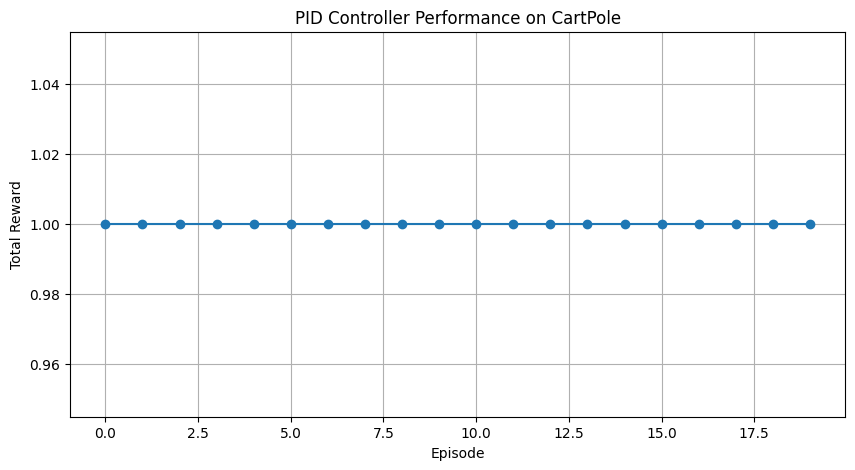

In [2]:
# Step 1: Install dependencies
!pip install gymnasium[classic_control] matplotlib

# Step 2: Imports
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

# PID gains — tune these!
Kp = 50.0   # Proportional gain
Ki = 0.0    # Integral gain (optional)
Kd = 5.0    # Derivative gain

# Number of episodes to run
num_episodes = 20

# For plotting
episode_rewards = []

# Step 3: PID Controller over multiple episodes
env = gym.make("CartPole-v1")

for ep in range(num_episodes):
    obs, info = env.reset(seed=ep)  # use different seed per run
    integral_error = 0.0
    total_reward = 0.0

    for t in range(500):  # Max length of episode
        # Observation: [cart_pos, cart_vel, pole_angle, pole_ang_vel]
        cart_pos, cart_vel, pole_angle, pole_ang_vel = obs

        error = pole_angle
        integral_error += error
        derivative_error = pole_ang_vel

        # PID control law
        u = Kp * error + Ki * integral_error + Kd * derivative_error

        # Convert to action: 0 (left), 1 (right)
        action = 1 if u > 0 else 0

        obs, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        if terminated or truncated:
            break

    episode_rewards.append(total_reward/500)
    print(f"Episode {ep + 1}: Reward = {total_reward}")

env.close()

# Step 4: Plot results
plt.figure(figsize=(10, 5))
plt.plot(episode_rewards, marker='o')
plt.title("PID Controller Performance on CartPole")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()

Example Code with Video

In [ ]:
# Step 1: Install dependencies
!pip install gymnasium[classic_control] moviepy

# Step 2: Imports
import gymnasium as gym
import numpy as np
import os
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

# Step 3: PID Controller Settings
Kp = 50.0
Ki = 0.0
Kd = 5.0

# Step 4: Create a folder to store the video
video_folder = "./pid_videos"
os.makedirs(video_folder, exist_ok=True)

# Step 5: Create environment with video recording
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = gym.wrappers.RecordVideo(
    env,
    video_folder=video_folder,
    name_prefix="pid_cartpole",
    episode_trigger=lambda episode_id: True  # record every episode
)

obs, info = env.reset(seed=42)
integral_error = 0.0
total_reward = 0.0

# Step 6: Run one episode
for t in range(500):
    cart_pos, cart_vel, pole_angle, pole_ang_vel = obs

    error = pole_angle
    integral_error += error
    derivative_error = pole_ang_vel

    u = Kp * error + Ki * integral_error + Kd * derivative_error
    action = 1 if u > 0 else 0

    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward

    if terminated or truncated:
        break

env.close()

print(f"Total reward: {total_reward}")

# Step 7: Find the video file
import glob
video_path = glob.glob(f"{video_folder}/*.mp4")[0]
print(f"Video saved at: {video_path}")

# Step 8: Display video in Colab
VideoFileClip(video_path).ipython_display(width=500)


  if event.key is 'enter':

  logger.warn(



Total reward: 500.0
Video saved at: ./pid_videos/pid_cartpole-episode-0.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
